In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/Final Clean Table BIIT - results-20220128-180306.csv") #csv no concept of multiple sheet name | pd.read_excel() to read xls file with sheet_name

In [ ]:
df.head()

,Patient_ID,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1001,40,M,ATA,140,289,0,Normal,172,False,0.0,Up,0
1,1002,49,F,NAP,160,180,0,Normal,156,False,1.0,Flat,1
2,1003,37,M,ATA,130,283,0,ST,98,False,0.0,Up,0
3,1004,48,F,ASY,138,214,0,Normal,108,True,1.5,Flat,1
4,1005,54,M,NAP,150,195,0,Normal,122,False,0.0,Up,0


In [ ]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [ ]:
(df == 0).sum() #show all zero value in dataframe

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol         0
FastingBS         704
RestingECG          0
MaxHR               0
ExerciseAngina    547
Oldpeak           368
ST_Slope            0
dtype: int64

In [ ]:
df.isna().sum()

Patient_ID        0
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
y = df.HeartDisease

In [ ]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [ ]:
df = df.drop(['Patient_ID','HeartDisease'], axis='columns')

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,False,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,False,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,False,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,True,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,False,0.0,Up


In [ ]:
X = df

In [ ]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,False,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,False,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,False,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,True,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,False,0.0,Up


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer


In [ ]:
ohe = OneHotEncoder()

In [ ]:
ct = make_column_transformer(
    (ohe, ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']) ,
     remainder='passthrough')

In [ ]:
ct.fit_transform(X)

array([[  0. ,   1. ,   0. , ...,   0. , 172. ,   0. ],
       [  1. ,   0. ,   0. , ...,   0. , 156. ,   1. ],
       [  0. ,   1. ,   0. , ...,   0. ,  98. ,   0. ],
       ...,
       [  0. ,   1. ,   1. , ...,   0. , 115. ,   1.2],
       [  1. ,   0. ,   0. , ...,   0. , 174. ,   0. ],
       [  0. ,   1. ,   0. , ...,   0. , 173. ,   0. ]])

In [ ]:
X = ct.fit_transform(X)

In [ ]:
X[0]

array([  0.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,
         0.,   0.,   1.,  40., 140., 289.,   0., 172.,   0.])

In [ ]:
X[1]

array([  1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,   0.,
         0.,   1.,   0.,  49., 160., 180.,   0., 156.,   1.])

In [ ]:
df_cat = df[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]

In [ ]:
df_cat.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,False,Up
1,F,NAP,Normal,False,Flat
2,M,ATA,ST,False,Up
3,F,ASY,Normal,True,Flat
4,M,NAP,Normal,False,Up


In [ ]:
df_catA = ohe.fit_transform(df_cat)

In [ ]:
ohe.categories_

[array(['F', 'M'], dtype=object),
 array(['ASY', 'ATA', 'NAP', 'TA'], dtype=object),
 array(['LVH', 'Normal', 'ST'], dtype=object),
 array([False,  True]),
 array(['Down', 'Flat', 'Up'], dtype=object)]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((642, 20), (276, 20))

In [ ]:
from sklearn.linear_model import LogisticRegression # LinearRegression is for value, LogisticRegression is for categorical or yes or no
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
model.predict(X_test)

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
model.predict([[  1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,   0.,
         0.,   1.,   0.,  49., 160., 180.,   0., 156.,   1.]])

array([0])

In [ ]:
model.predict([[  0.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,
         0.,   0.,   1.,  40., 140., 289.,   0., 172.,   0.]])

array([0])

In [ ]:
model.score(X_test,y_test)

0.8405797101449275

In [ ]:
df_num = df[df.columns[~df.columns.isin(df_cat)]]

In [ ]:
df_num.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0


In [ ]:
df_num.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')

In [ ]:
df_cat.columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [ ]:
X

array([[  0. ,   1. ,   0. , ...,   0. , 172. ,   0. ],
       [  1. ,   0. ,   0. , ...,   0. , 156. ,   1. ],
       [  0. ,   1. ,   0. , ...,   0. ,  98. ,   0. ],
       ...,
       [  0. ,   1. ,   1. , ...,   0. , 115. ,   1.2],
       [  1. ,   0. ,   0. , ...,   0. , 174. ,   0. ],
       [  0. ,   1. ,   0. , ...,   0. , 173. ,   0. ]])

In [ ]:
X.dtype

dtype('float64')

In [ ]:
Xdf = pd.DataFrame (X_train, columns = [['F', 'M', 'ASY', 'ATA', 'NAP', 'TA', 'LVH', 'Normal', 'ST', 'False', 'True','Down', 'Flat', 'Up', 'Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']])

In [ ]:
Xdf.corr()

,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST,False,True,Down,Flat,Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
F,1.000000,-1.000000,-0.140004,0.125250,0.034997,0.022324,0.006901,0.040683,-0.056598,0.148493,-0.148493,-0.056983,-0.093574,0.124261,-0.034672,-0.027758,0.153887,-0.091508,0.177595,-0.085924
M,-1.000000,1.000000,0.140004,-0.125250,-0.034997,-0.022324,-0.006901,-0.040683,0.056598,-0.148493,0.148493,0.056983,0.093574,-0.124261,0.034672,0.027758,-0.153887,0.091508,-0.177595,0.085924
ASY,-0.140004,0.140004,1.000000,-0.538122,-0.556035,-0.242264,0.007843,-0.066449,0.073498,-0.435852,0.435852,0.109991,0.310001,-0.370280,0.146599,0.065288,0.072247,0.149715,-0.352978,0.286378
ATA,0.125250,-0.125250,-0.538122,1.000000,-0.267439,-0.116523,-0.084689,0.110570,-0.051299,0.289124,-0.289124,-0.113393,-0.298874,0.360851,-0.216598,-0.046394,0.009971,-0.133282,0.248229,-0.269201
NAP,0.034997,-0.034997,-0.556035,-0.267439,1.000000,-0.120402,0.028043,-0.001724,-0.025684,0.174872,-0.174872,-0.017075,-0.092301,0.102016,-0.006828,-0.071014,-0.077194,-0.061495,0.143331,-0.102733
TA,0.022324,-0.022324,-0.242264,-0.116523,-0.120402,1.000000,0.086211,-0.049646,-0.024723,0.131930,-0.131930,-0.009416,0.018599,-0.013804,0.078875,0.070790,-0.038151,0.020463,0.077462,0.037426
LVH,0.006901,-0.006901,0.007843,-0.084689,0.028043,0.086211,1.000000,-0.609711,-0.245377,0.032115,-0.032115,0.058125,0.036733,-0.067561,0.164141,0.014809,0.090914,-0.054482,0.100122,0.095168
Normal,0.040683,-0.040683,-0.066449,0.110570,-0.001724,-0.049646,-0.609711,1.000000,-0.618782,0.043784,-0.043784,-0.054802,-0.069276,0.098621,-0.247539,-0.093094,-0.023305,-0.077887,0.079087,-0.117585
ST,-0.056598,0.056598,0.073498,-0.051299,-0.025684,-0.024723,-0.245377,-0.618782,1.000000,-0.085379,0.085379,0.009419,0.048322,-0.053660,0.140076,0.099183,-0.061601,0.149258,-0.195959,0.049494
False,0.148493,-0.148493,-0.435852,0.289124,0.174872,0.131930,0.032115,0.043784,-0.085379,1.000000,-1.000000,-0.143806,-0.383221,0.461854,-0.215145,-0.144656,-0.087671,-0.101260,0.387370,-0.410055


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

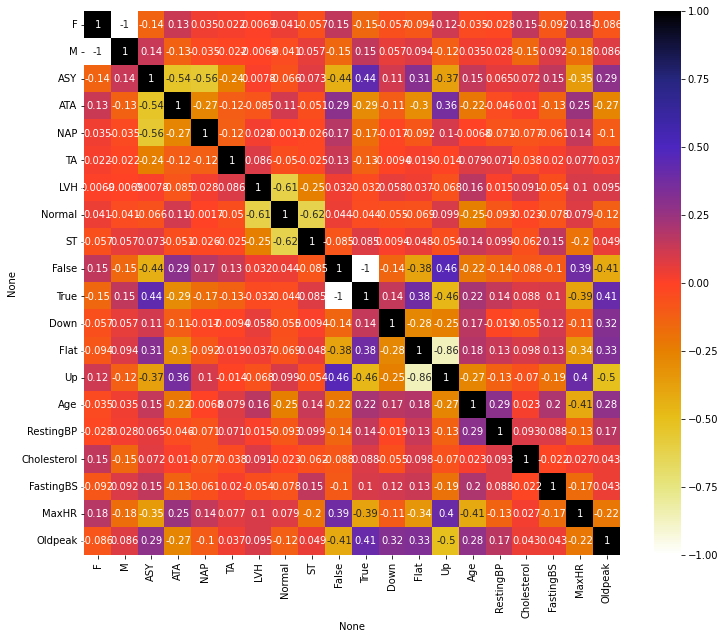

In [ ]:
plt.figure(figsize=(12,10))
cor = Xdf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(Xdf, 0.8)

In [ ]:
corr_features

{('M',), ('True',), ('Up',)}

In [ ]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [ ]:
 comb = np.column_stack([X_train,y_train])

In [ ]:
comb.shape

(642, 21)

In [ ]:
combdf = pd.DataFrame (comb, columns = [['F', 'M', 'ASY', 'ATA', 'NAP', 'TA', 'LVH', 'Normal', 'ST', 'False', 'True','Down', 'Flat', 'Up', 'Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']])

In [ ]:
combdf.head()

,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST,False,True,Down,Flat,Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,32.0,118.0,529.0,0.0,130.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,36.0,112.0,340.0,0.0,184.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,51.0,95.0,223.0,1.0,126.0,2.2,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,59.0,130.0,126.0,0.0,125.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,60.0,117.0,230.0,1.0,160.0,1.4,1.0


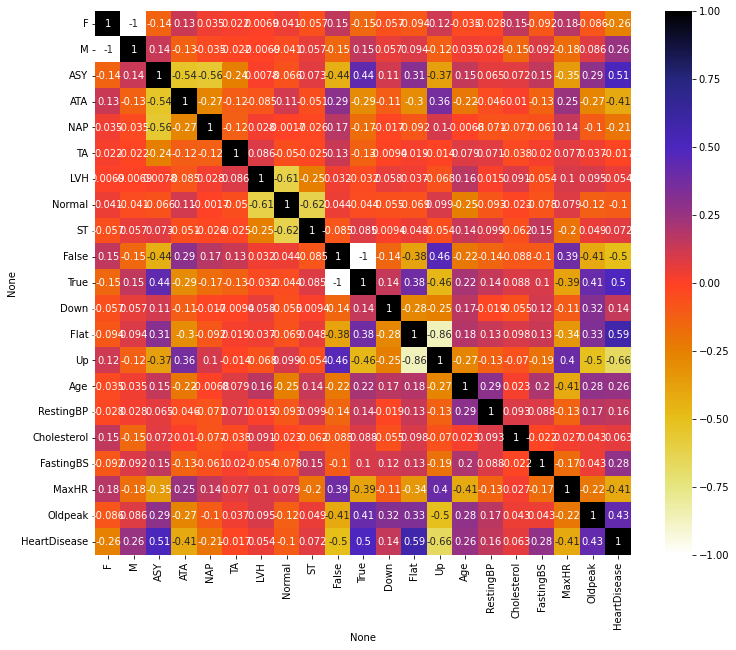

In [ ]:
plt.figure(figsize=(12,10))
cor = combdf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
corr_features = correlation(combdf, 0.5)

In [ ]:
corr_features

{('ATA',),
 ('HeartDisease',),
 ('M',),
 ('NAP',),
 ('Normal',),
 ('Oldpeak',),
 ('ST',),
 ('True',),
 ('Up',)}

In [ ]:
combdf.head()

,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST,False,True,Down,Flat,Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,32.0,118.0,529.0,0.0,130.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,36.0,112.0,340.0,0.0,184.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,51.0,95.0,223.0,1.0,126.0,2.2,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,59.0,130.0,126.0,0.0,125.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,60.0,117.0,230.0,1.0,160.0,1.4,1.0


In [ ]:
combdf.columns

MultiIndex([(           'F',),
            (           'M',),
            (         'ASY',),
            (         'ATA',),
            (         'NAP',),
            (          'TA',),
            (         'LVH',),
            (      'Normal',),
            (          'ST',),
            (       'False',),
            (        'True',),
            (        'Down',),
            (        'Flat',),
            (          'Up',),
            (         'Age',),
            (   'RestingBP',),
            ( 'Cholesterol',),
            (   'FastingBS',),
            (       'MaxHR',),
            (     'Oldpeak',),
            ('HeartDisease',)],
           )

In [ ]:
#F, M, ASY, ATA, NAP, TA, LVH, Normal, ST, False, True, Oldpeak, Down, Flat, Up

In [ ]:
Xdf_reduce = combdf[['ASY', 'ATA', 'NAP', 'TA', 'LVH', 'Normal', 'ST', 'False', 'True',  'Oldpeak', 'Down', 'Flat', 'Up']]

In [ ]:
Xdf_reduce

,ASY,ATA,NAP,TA,LVH,Normal,ST,False,True,Oldpeak,Down,Flat,Up
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.2,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.4,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.8,0.0,1.0,0.0
638,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
639,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
640,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0


In [ ]:
X_reduce = Xdf_reduce.values

In [ ]:
X_reduce

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])